In [2]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
df = titanic.loc[: ,['age', 'fare']]
df['ten'] = 10

def add_10(n):
    return n+10

# apply() 매서드를 활용하여 시리즈의 각 원소에 동일한 함수 실행
ar = df['age'].apply(add_10)

ar3 = df['age'].apply(lambda x: add_10(x))
ar3

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64

In [11]:
df_map = df.applymap(add_10)
df_map.head()

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20


In [51]:
# titanic 데이터를 load
# age와 fare 칼럼만 추출
# age에 평균나이를 차감한 값을 'age_avg' 칼럼으로 추가 정수로
# 나이 단계를 4단계 (0~20청소년, 21~70청년, 71~ 노년)으로 칼럼추가
# one_hot_incording

import pandas as pd
import seaborn as sns
import numpy as np

titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [60]:
df = titanic.loc[: ,['age', 'fare']]
avg = df['age'].mean()

def min_age(n):
    return n-avg

avg_min = df['age'].apply(min_age)

df['age_avg'] = avg_min
df['age_avg'] = round(df['age_avg'])
df.dropna(subset=['age_avg'], axis = 0, inplace=True)
df['age_avg'] = df['age_avg'].astype('int')


bin_label = ['청소년','장년','노년']
bins_value = [0,21, 71,100]
df['age_bin'] = pd.cut(x= df['age'],
                      bins = bins_value,
                      labels = bin_label,
                      include_lowest = True)

df[bin_label]=pd.get_dummies(df['age_bin'])
df[['age','age_avg']] = df[['age','age_avg']].astype('int')

df.head(10)

,age,fare,age_avg,age_bin,청소년,장년,노년
0,22,7.2500,-8,장년,0,1,0
1,38,71.2833,8,장년,0,1,0
2,26,7.9250,-4,장년,0,1,0
3,35,53.1000,5,장년,0,1,0
4,35,8.0500,5,장년,0,1,0
6,54,51.8625,24,장년,0,1,0
7,2,21.0750,-28,청소년,1,0,0
8,27,11.1333,-3,장년,0,1,0
9,14,30.0708,-16,청소년,1,0,0
10,4,16.7000,-26,청소년,1,0,0


['노년' '장년' '청소년']
[  2 508 204]


<function matplotlib.pyplot.show(close=None, block=None)>

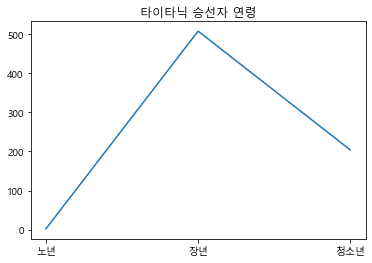

In [67]:
u_age, cnt = np.unique(df['age_bin'],return_counts=True)
print(u_age)
print(cnt)


import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

plt.title("타이타닉 승선자 연령")
plt.plot(u_age, cnt)
plt.show